**Общая информация**

**Срок сдачи:** 21 октября 2020, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_20newsgroups

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KDTree

from sklearn.model_selection import KFold, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer


from scipy.spatial.distance import cdist
from sklearn.metrics import pairwise_distances, accuracy_score


##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [82]:
class MyKNeighborsClassifier(BaseEstimator):

    def __init__(self, n_neighbors, algorithm='brute', metric= 'euclidean'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm
        self.metric = metric

    def fit(self, X, y):
        self.X = X
        self.y = y
        if (self.algorithm == 'kd_tree'):
            self.KDTree = KDTree(self.X, metric=self.metric)

    def predict(self, X):
        if self.algorithm == 'brute':
            diff_s = pairwise_distances(X, self.X, self.metric)
            index = np.argpartition(diff_s, range(self.n_neighbors), axis=1)[:, :self.n_neighbors]
            local = self.y[index]
        elif self.algorithm == 'kd_tree':
            index = self.KDTree.query(X, k=self.n_neighbors)[1]
            local = self.y[index[:, :self.n_neighbors]]
        
        return np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=1, arr=local)


**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [83]:
iris = datasets.load_iris()

In [84]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [85]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [86]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [87]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [88]:
%time clf.fit(X_train, y_train)

Wall time: 997 µs


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [89]:

%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [90]:
%time clf.predict(X_test)

Wall time: 2 ms


array([1, 2, 0, 2, 0, 0, 2, 0, 0, 1, 2, 2, 1, 2, 1])

In [91]:
%time my_clf.predict(X_test)

Wall time: 998 µs


array([1, 2, 0, 2, 0, 0, 2, 0, 0, 1, 2, 2, 1, 2, 1], dtype=int64)

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [92]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [93]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [94]:
%time clf.fit(X_train, y_train)

Wall time: 5.98 ms


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [95]:
%time my_clf.fit(X_train, y_train)

Wall time: 997 µs


In [96]:
%time clf.predict(X_test)

Wall time: 5.97 ms


array([0, 0, 1, 1, 2, 1, 2, 1, 2, 0, 1, 2, 2, 0, 0])

In [97]:
%time my_clf.predict(X_test)

Wall time: 997 µs


array([0, 0, 1, 1, 2, 1, 2, 1, 2, 0, 1, 2, 2, 0, 0], dtype=int64)

In [98]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [99]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [100]:
data = newsgroups['data']
target = newsgroups['target']

In [101]:
MAXFEATURES = 1200
N = 50
MAXDF = 0.05

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [102]:
X = CountVectorizer(max_features = MAXFEATURES, max_df = MAXDF).fit_transform(data)

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [103]:
kf = KFold(n_splits=3)
(train1, test1), (train2, test2) , (train2, test2) = kf.split(X) 

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

In [104]:
def fu (clf, X, y, n_neighbors, cv=3,algorithm='brute', metric='euclidean'):    
    cros_valid_score = []
    for i in range(1, n_neighbors + 1):
        my_clf = clf(n_neighbors=i, algorithm=algorithm, metric=metric)
        cros_valid_score.append(cross_val_score(my_clf, X, y, cv=cv, scoring='accuracy').mean())
    return cros_valid_score

def fuu (clf, X, y, n_neighbors, cv=3,algorithm='brute', metric='euclidean'):
    return int(np.array(fu (clf, X, y, n_neighbors, cv=cv,algorithm=algorithm, metric=metric)).argmax()) + 1


In [105]:
fuu(MyKNeighborsClassifier, X, target, N, cv=3)

1

In [106]:
score1 = fu(MyKNeighborsClassifier, X, target, N, cv=3)

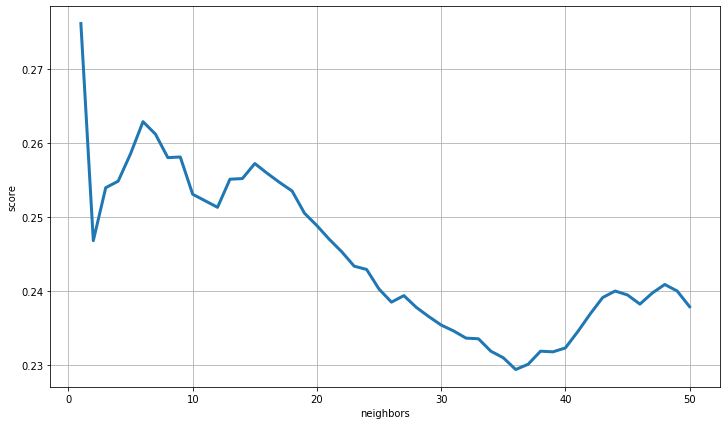

In [107]:
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111)

ax.plot(range(1,N+1),score1, linewidth=3)
ax.set_ylabel('score')
ax.set_xlabel('neighbors')
ax.grid()
plt.show()

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

In [108]:
score2 = fu (MyKNeighborsClassifier, X, target, N, cv=3, metric='cosine')

In [109]:
X = TfidfVectorizer(max_features = MAXFEATURES,  max_df = MAXDF).fit_transform(data)

In [110]:
score3 = fu (MyKNeighborsClassifier, X, target, N , cv=3)

In [111]:
score4 = fu (MyKNeighborsClassifier, X, target, N, cv=3, metric='cosine')

In [112]:
SCORE = np.array([score1,score2,score3,score4])

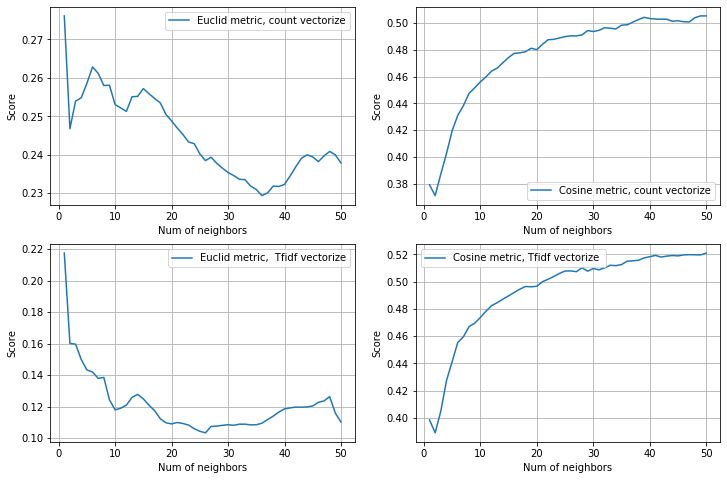

In [113]:
fig, axes = plt.subplots(2, 2, figsize=(12,8), sharex=False, sharey=False)
fig.set_figheight(8)
fig.set_figwidth(12)

d = {0: 'Euclid metric, count vectorize', 
     1: 'Cosine metric, count vectorize',
     2: 'Euclid metric,  Tfidf vectorize', 
     3: 'Cosine metric, Tfidf vectorize '}

for ax, i in zip(axes.flatten(), d):
    ax.set(xlabel='Num of neighbors', ylabel='Score');
    s = sns.lineplot(ax = ax, x=np.arange(1,N+1), y=SCORE[i,:], label=d[i])
    ax.grid()
plt.show()

Косинусная метрика существенно лучше Eвклидовой

**Лучшей моделью является :** 

In [114]:
d[np.unravel_index(np.argmax(SCORE), SCORE.shape)[0]] 

'Cosine metric, Tfidf vectorize '

**С числом соседей:**

In [115]:
BEST_K = np.unravel_index(np.argmax(SCORE), SCORE.shape)[1] + 1 
BEST_K

50

**И точностью:**

In [116]:
best_trian_score = np.max(SCORE)
best_trian_score

0.5209484363703241

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [117]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])
data = np.asarray(newsgroups['data'])
vectorizer = TfidfVectorizer(max_features=MAXFEATURES,  max_df = MAXDF)

X = vectorizer.fit_transform(data)
target = np.asarray(newsgroups['target'])

vocab = vectorizer.get_feature_names()

In [118]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])
data_test = np.asarray(newsgroups['data'])

X_test = TfidfVectorizer(vocabulary=vocab,max_features=MAXFEATURES, max_df = MAXDF).fit_transform(data_test)
target_test  = np.asarray(newsgroups['target'])

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [119]:
clf = MyKNeighborsClassifier(n_neighbors = BEST_K, metric='cosine')
clf.fit(X, target)
score_TfidfVectorizer_cosine = accuracy_score(clf.predict(X_test), target_test)

score_TfidfVectorizer_cosine

0.47729686670207117

**Отличия:**

In [120]:
best_trian_score - score_TfidfVectorizer_cosine

0.0436515696682529

**И для CountVectorizer_cosine тоже сравним результаты:**

In [121]:
BEST_K_CountVectorizer_cosine = np.unravel_index(np.argmax(SCORE[3, :]), SCORE.shape)[1] + 1 
BEST_K_CountVectorizer_cosine

50

In [122]:
BEST_SCORE_CountVectorizer_cosine = np.max(SCORE[1, :])
BEST_SCORE_CountVectorizer_cosine

0.5052151453685683

In [123]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])
data = np.asarray(newsgroups['data'])
vectorizer = CountVectorizer(max_features=MAXFEATURES,  max_df = MAXDF)

X = vectorizer.fit_transform(data)
target = np.asarray(newsgroups['target'])

vocab = vectorizer.get_feature_names()

In [124]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])
data_test = np.asarray(newsgroups['data'])

X_test = CountVectorizer(vocabulary=vocab,max_features=MAXFEATURES,max_df = MAXDF).fit_transform(data_test)
target_test  = np.asarray(newsgroups['target'])

In [125]:
clf = MyKNeighborsClassifier(n_neighbors = BEST_K_CountVectorizer_cosine , metric='cosine')
clf.fit(X, target)
score_CountVectorizer_cosine = accuracy_score(clf.predict(X_test), target_test)

score_CountVectorizer_cosine

0.4587095061072756

**Отличия:**

In [126]:
BEST_SCORE_CountVectorizer_cosine - score_CountVectorizer_cosine

0.04650563926129264

Как мы можем заметить, разница между оценкой при кросс-валидации на трейне и оценкой на тесте меньше для TfidfVectorizer